11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 36ms/step - accuracy: 0.9098 - loss: 0.2841 - val_accuracy: 0.9843 - val_loss: 0.0490
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9859 - loss: 0.0434 - val_accuracy: 0.9903 - val_loss: 0.0314
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 32ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.9882 - val_loss: 0.0340
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9934 - loss: 0.0204 - val_accuracy: 0.9877 - val_loss: 0.0389
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9948 - loss: 0.0154 - val_accuracy: 0.9904 - val_loss: 0.0284


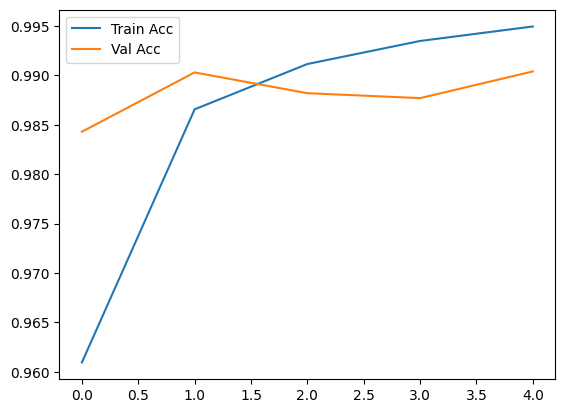

313/313 - 4s - 12ms/step - accuracy: 0.9904 - loss: 0.0284
Test Accuracy: 0.9904
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


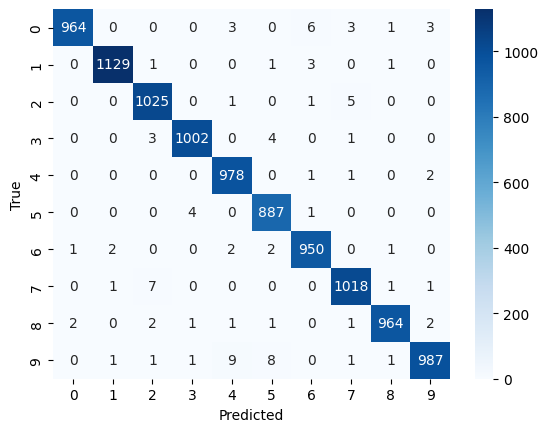

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Reshape for CNN input (28x28x1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255.0

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot Accuracy & Loss
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.show()

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

# Confusion Matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, y_pred))


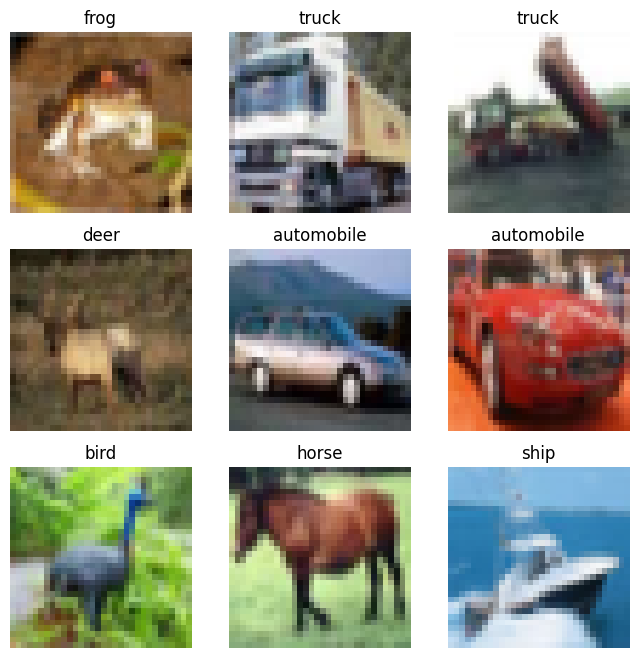

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.3668 - loss: 1.7296 - val_accuracy: 0.5236 - val_loss: 1.3305
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.5848 - loss: 1.1692 - val_accuracy: 0.6433 - val_loss: 1.0295
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.6542 - loss: 0.9909 - val_accuracy: 0.6624 - val_loss: 0.9679
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.6903 - loss: 0.8855 - val_accuracy: 0.6838 - val_loss: 0.9138
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7182 - loss: 0.8094 - val_accuracy: 0.7010 - val_loss: 0.8684
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.7449 - loss: 0.7273 - val_accuracy: 0.7038 - val_loss: 0.8592
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.7596 - loss: 0.6869 - val_accuracy: 0.7224 - val_loss: 0.8222
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7768 -

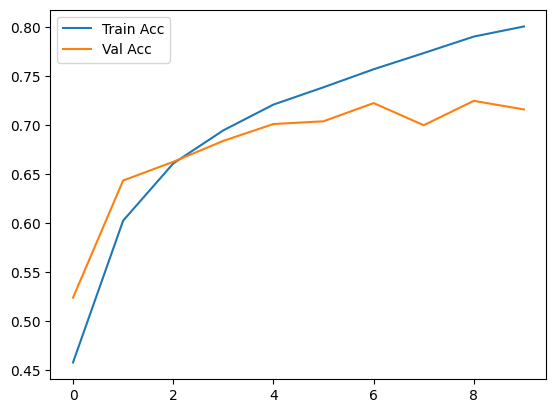

313/313 - 5s - 15ms/step - accuracy: 0.7159 - loss: 0.8501
Test Accuracy: 0.7159
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


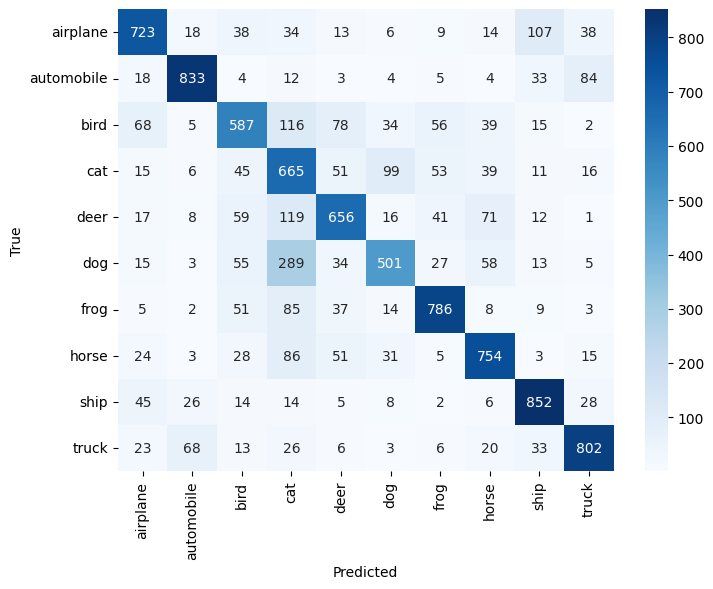

              precision    recall  f1-score   support

    airplane       0.76      0.72      0.74      1000
  automobile       0.86      0.83      0.84      1000
        bird       0.66      0.59      0.62      1000
         cat       0.46      0.67      0.54      1000
        deer       0.70      0.66      0.68      1000
         dog       0.70      0.50      0.58      1000
        frog       0.79      0.79      0.79      1000
       horse       0.74      0.75      0.75      1000
        ship       0.78      0.85      0.82      1000
       truck       0.81      0.80      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



In [4]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

# Define class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Show sample images
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.show()

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

# Confusion Matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, y_pred, target_names=class_names))


In [22]:
import requests
from tensorflow.keras.preprocessing import image
import numpy as np

# ✅ Direct image URL
url = "https://upload.wikimedia.org/wikipedia/commons/7/7e/Red_car.jpg"

# Download image properly
response = requests.get(url, stream=True)
with open("car.jpg", "wb") as f:
    f.write(response.content)

# Load the image with keras
img = image.load_img("/content/cat-1 (1).jpg", target_size=(32,32))  # resize for CIFAR-10
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict class
prediction = model.predict(img_array)
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
pred_class = class_names[np.argmax(prediction)]
print("Predicted Class:", pred_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: cat


In [24]:
import requests
from tensorflow.keras.preprocessing import image
import numpy as np

# ✅ Direct image URL
url = "https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg"

# Download image properly
response = requests.get(url, stream=True)
with open("car.jpg", "wb") as f:
    f.write(response.content)

# Load the image with keras
img = image.load_img("/content/dog-1.jpg", target_size=(32,32))  # resize for CIFAR-10
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Predict class
prediction = model.predict(img_array)
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
pred_class = class_names[np.argmax(prediction)]
print("Predicted Class:", pred_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Class: dog
